<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Predictive-Modeling" data-toc-modified-id="Predictive-Modeling-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Predictive Modeling</a></span><ul class="toc-item"><li><span><a href="#Helper-Functions" data-toc-modified-id="Helper-Functions-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Helper Functions</a></span><ul class="toc-item"><li><span><a href="#Prediction-Plot" data-toc-modified-id="Prediction-Plot-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Prediction Plot</a></span></li></ul></li><li><span><a href="#Target-variable:-Windspeed" data-toc-modified-id="Target-variable:-Windspeed-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Target variable: Windspeed</a></span></li><li><span><a href="#Creating-a-Train/Test-split" data-toc-modified-id="Creating-a-Train/Test-split-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Creating a Train/Test split</a></span></li><li><span><a href="#Linear-Regression-with-sklearn" data-toc-modified-id="Linear-Regression-with-sklearn-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Linear Regression with sklearn</a></span></li><li><span><a href="#Polynomial-Regression" data-toc-modified-id="Polynomial-Regression-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Polynomial Regression</a></span></li><li><span><a href="#GradientBoostingRegressor" data-toc-modified-id="GradientBoostingRegressor-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>GradientBoostingRegressor</a></span></li><li><span><a href="#AdaBoostRegressor" data-toc-modified-id="AdaBoostRegressor-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>AdaBoostRegressor</a></span></li><li><span><a href="#Random-Forest-Regressor" data-toc-modified-id="Random-Forest-Regressor-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Random-Forest-Regressor</a></span></li><li><span><a href="#XGBoost-Regressor" data-toc-modified-id="XGBoost-Regressor-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>XGBoost Regressor</a></span><ul class="toc-item"><li><span><a href="#XGBoost-Regressor-for-2018" data-toc-modified-id="XGBoost-Regressor-for-2018-1.9.1"><span class="toc-item-num">1.9.1&nbsp;&nbsp;</span>XGBoost Regressor for 2018</a></span></li></ul></li><li><span><a href="#KNeighborsRegressor" data-toc-modified-id="KNeighborsRegressor-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>KNeighborsRegressor</a></span></li><li><span><a href="#Support-Vector-Regressor" data-toc-modified-id="Support-Vector-Regressor-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>Support Vector Regressor</a></span></li><li><span><a href="#Auto-Regressive-Integrated-Moving-Average---ARIMA" data-toc-modified-id="Auto-Regressive-Integrated-Moving-Average---ARIMA-1.12"><span class="toc-item-num">1.12&nbsp;&nbsp;</span>Auto Regressive Integrated Moving Average - ARIMA</a></span></li><li><span><a href="#SARIMAX-Regression" data-toc-modified-id="SARIMAX-Regression-1.13"><span class="toc-item-num">1.13&nbsp;&nbsp;</span>SARIMAX Regression</a></span></li></ul></li></ul></div>

# Predictive Modeling

In [8]:
# importing packages

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import xgboost as xgb
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn import decomposition
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import norm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn import model_selection, preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.api as sm

sns.set()

## Helper Functions

In [3]:

def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['precision'] = precision_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(test_labels, predictions)
    results['precision'] = precision_score(test_labels, predictions)
    results['roc'] = roc_auc_score(test_labels, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(train_labels, train_predictions)
    train_results['precision'] = precision_score(train_labels, train_predictions)
    train_results['roc'] = roc_auc_score(train_labels, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(test_labels, [1 for _ in range(len(test_labels))])
    model_fpr, model_tpr, _ = roc_curve(test_labels, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline', linewidth=3)
    plt.plot(model_fpr, model_tpr, 'r', label = 'model', linewidth=3)
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');


In [4]:
def feature_plot(importances, X_train, y_train,title):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:10]]
    values = importances[indices][:10]

    # Creat the plot
    fig = plt.figure(figsize = (12,8))
    plt.title("Normalized Weights for First Ten Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(10), values, width = 0.6, align="center", color = '#3296c8', \
          label = "Feature Weight") #'#00A000'
    plt.bar(np.arange(10) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#c8dcb4', \
          label = "Cumulative Feature Weight")  #'#0AA0A0' '#96c896'
    plt.xticks(np.arange(10), columns, rotation=45)
    plt.xlim((-0.5, 9.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12)
    
    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.savefig(title, dpi=500)
    plt.show()

In [5]:
# helper function for polynomial regression

def create_polynomial_regression_model(degree):
    "Creates a polynomial regression model for the given degree"
    
    poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
    X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, Y_train)
  
  # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
    y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on training dataset
    rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
    r2_train = r2_score(Y_train, y_train_predicted)
  
  # evaluating the model on test dataset
    rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
    r2_test = r2_score(Y_test, y_test_predict)
    
    #print("The model performance for the training set")
    #print("-------------------------------------------")
    #print("RMSE of training set is {}".format(rmse_train))
    #print("R2 score of training set is {}".format(r2_train))
  
    #print("\n")
  
    #print("The model performance for the test set")
    #print("------------------------------------------")
    #print("RMSE of test set is {}".format(rmse_test))
    #print("R2 score of test set is {}".format(r2_test))
    


### Prediction Plot

In [22]:
def prediction_plot(x,y,z,a,b):
    
    #plt.figure(figsize=(15,10))     
    plt.plot(x.values)
    plt.plot(y)
    plt.suptitle(b,fontsize=15)
    plt.ylabel(z)
    plt.xlabel('Hour')
    plt.ylim(0,15)  
    labels=('actual','predicted')
    plt.legend(labels)
    plt.savefig(a, dpi=500);

In [6]:
## load cleaned weather data

df = pd.read_csv('weather_data_cleaned.csv', index_col='MESS_DATUM', parse_dates=True)
df = df.iloc[:,1:]
df.head()

,ATMO_LBERG,FD_LBERG,FG_LBERG,SD_LBERG,ZENIT,R1,TT_TU,RF_TU,TD,V_N,P,FF,DD,V_TE005,V_TE010,V_TE020,V_TE050,V_TE100,V_VV
MESS_DATUM,,,,,,,,,,,,,,,,,,,
2005-01-01 00:00:00,120.0,0.0,0.0,0.0,148.86,0.0,4.7,95.0,4.0,7.0,1020.2,2.2,350.0,5.6,5.5,5.2,4.6,5.2,2000.0
2005-01-01 01:00:00,100.0,0.0,0.0,0.0,144.98,0.1,4.3,95.0,3.6,7.0,1020.5,1.5,310.0,5.3,5.4,5.2,4.6,5.1,3500.0
2005-01-01 02:00:00,89.0,0.0,0.0,0.0,138.39,0.0,3.1,96.0,2.5,2.0,1021.3,1.5,280.0,4.7,5.1,5.1,4.6,5.1,800.0
2005-01-01 06:00:00,113.0,0.0,0.0,0.0,104.08,0.0,2.0,98.0,1.7,8.0,1022.0,2.3,220.0,3.7,4.2,4.7,4.8,5.2,3500.0
2005-01-01 07:00:00,114.0,0.0,0.0,0.0,96.06,0.0,2.7,100.0,2.7,7.0,1021.8,2.8,210.0,3.6,4.0,4.5,4.7,5.2,4500.0


## Target variable: Windspeed

In [10]:
corr = df.corr(method ='pearson')
corr.FF[abs(corr.FF) > 0.1]

FD_LBERG    0.193999
FG_LBERG    0.165629
ZENIT      -0.170689
RF_TU      -0.257965
V_N         0.199774
P          -0.286196
FF          1.000000
DD          0.100914
V_TE020    -0.136062
V_TE050    -0.157404
V_TE100    -0.151442
Name: FF, dtype: float64

In [13]:
## Linear Regression for wind speed 

model = 'FF ~ FD_LBERG + FG_LBERG + ZENIT + RF_TU + P + DD + V_N + V_TE050'
smf.ols(formula=model, data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     FF   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     6229.
Date:                Sun, 12 Jan 2020   Prob (F-statistic):               0.00
Time:                        21:12:43   Log-Likelihood:            -2.6304e+05
No. Observations:              129579   AIC:                         5.261e+05
Df Residuals:                  129570   BIC:                         5.262e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     69.3452      0.558    124.179      0.000      68.251      70.440
FD_LBERG       0.0030      0.000      9.462      0.000       0.002       0.004
FG_LBERG       0.0002      0.000      1.397      0.163   -8.51e-05       0.001
ZENIT         -0.0023      0.000     -7.653      0.000      -0.003      -0.002
RF_TU         -0.0517      0.000   -119.946      0.000      -0.052      -0.051
P             -0.0606      0.001   -111.193      0.000      -0.062      -0.060
DD             0.0027   5.69e-05     47.178      0.000       0.003       0.003
V_N            0.1521      0.002     66.987      0.000       0.148       0.157
V_TE050       -0.0891      0.001    -94.253      0.000      -0.091      -0.087
==============================================================================
Omnibus:                     3716.644   Durbin-Watson:                   0.285
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4181.560
Skew:                           0.396   Prob(JB):                         0.00
Kurtosis:                       3.383   Cond. No.                     1.14e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Creating a Train/Test split

In [20]:
X = df[['FD_LBERG', 'FG_LBERG', 'ZENIT', 'RF_TU', 'V_N', 'P', 'DD', 'V_TE050']]
Y = df.FF

# choosing 9 days to test winter, summer, autumn and spring
X_test_winter = ['2019-01-02','2019-01-03','2019-01-04','2019-01-05','2019-01-06',
                '2019-01-07','2019-01-08','2019-01-09','2019-01-10']
X_test_summer = ['2019-07-02','2019-07-03','2019-07-04','2019-07-05','2019-07-06',
                '2019-07-07','2019-07-08','2019-07-09','2019-07-10']
X_test_autumn = ['2019-10-02','2019-10-03','2019-10-04','2019-10-05','2019-10-06',
                '2019-10-07','2019-07-08','2019-07-09','2019-07-10']
X_test_spring = ['2019-04-02','2019-04-03','2019-04-04','2019-04-05','2019-04-06',
                '2019-04-07','2019-04-08','2019-04-09','2019-04-10']

X_train_winter = ['2019-01-01','2019-01-02','2019-01-03','2019-01-04','2019-01-05',
                '2019-01-06','2019-01-07','2019-01-08','2019-01-09']
X_train_summer = ['2019-07-01','2019-07-02','2019-07-03','2019-07-04','2019-07-05',
                '2019-07-06','2019-07-07','2019-07-08','2019-07-09']
X_train_autumn = ['2019-10-01','2019-10-02','2019-10-03','2019-10-04','2019-10-05',
                '2019-10-06','2019-07-07','2019-07-08','2019-07-09']
X_train_spring = ['2019-04-01','2019-04-02','2019-04-03','2019-04-04','2019-04-05',
                '2019-04-06','2019-04-07','2019-04-08','2019-04-09']

## Linear Regression with sklearn

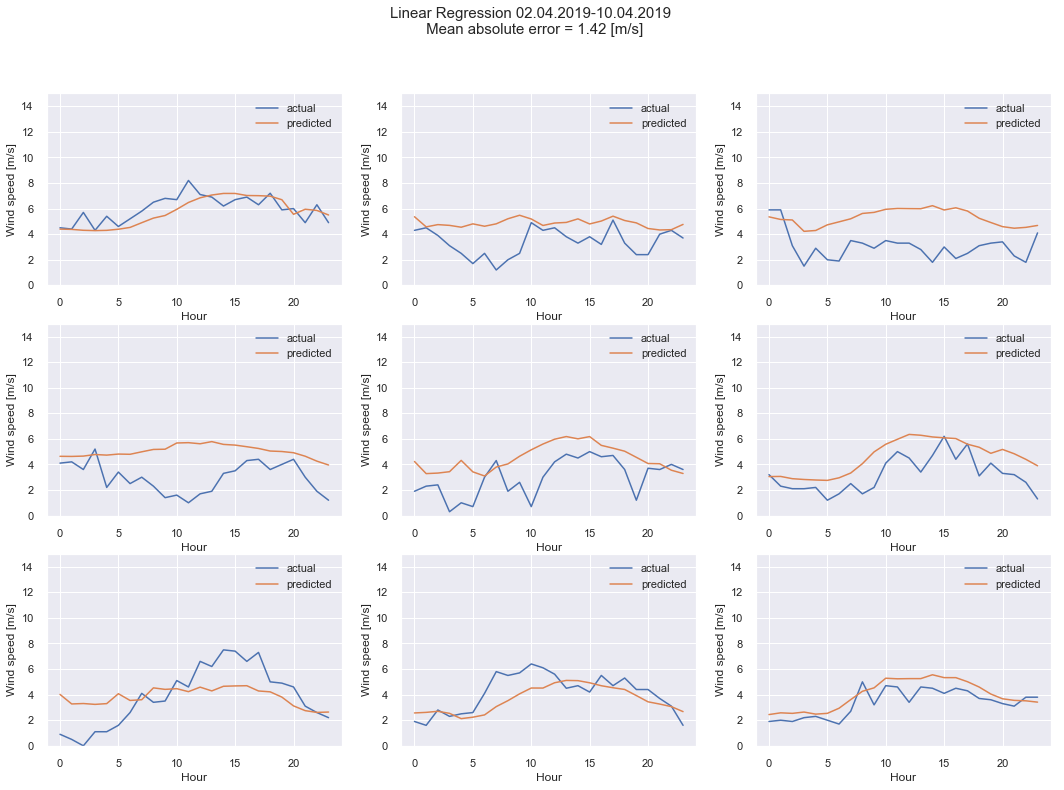

In [27]:
## linear regression for wind speed with sklearn

plt.figure(figsize=(18,12))
mae_sum=0
rmse_sum=0
r2_sum=0
for i,j,k in zip(X_test_spring, X_train_spring, range(9)):
    
    X_train = X.loc[:j]
    X_test = X.loc[i]
    Y_train = Y.loc[:j]
    Y_test = Y.loc[i]

    lin_model = LinearRegression()
    lin_model.fit(X_train, Y_train)

    y_pred = lin_model.predict(X_test)

    # Metrics
    mae0 = mean_absolute_error(Y_test.values.ravel(), y_pred)
    rmse0 = np.sqrt(mean_squared_error(Y_test.values.ravel(), y_pred))
    r2 = r2_score(Y_test.values.ravel(), y_pred)

    mae_sum+=abs(mae0)
    rmse_sum+=abs(rmse0)
    r2_sum+=abs(r2)
    
    plt.subplot(3,3,k+1)
    prediction_plot(Y_test, y_pred,'Wind speed [m/s]','Images/Wind_LinReg_spring.png','Linear Regression 02.04.2019-10.04.2019 \n Mean absolute error = '+str(round(mae_sum/9,2))+' [m/s]')
    


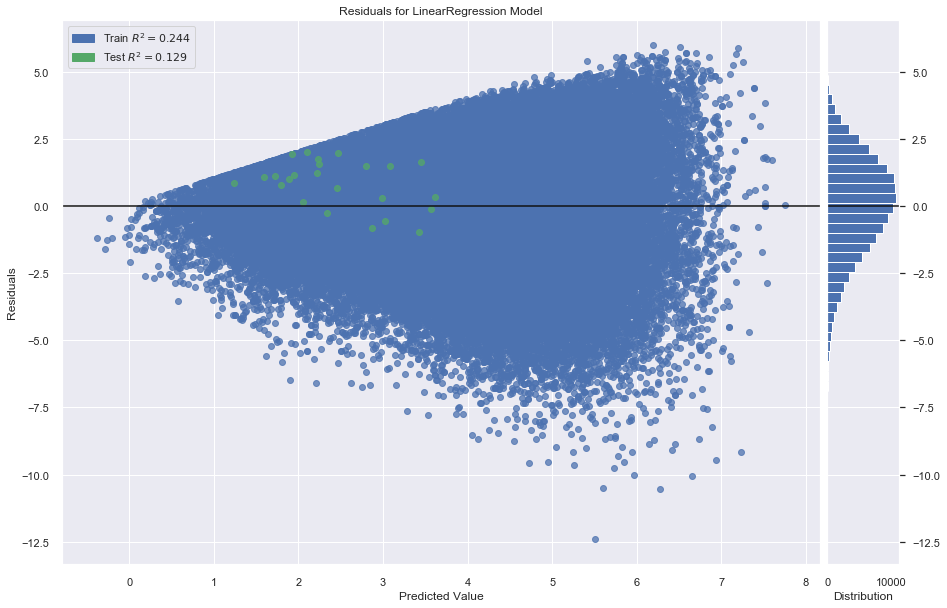

In [19]:

visualizer = ResidualsPlot(lin_model, size=(1080,720))
visualizer.fit(X_train, Y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, Y_test)  # Evaluate the model on the test data
visualizer.show();          

## Polynomial Regression

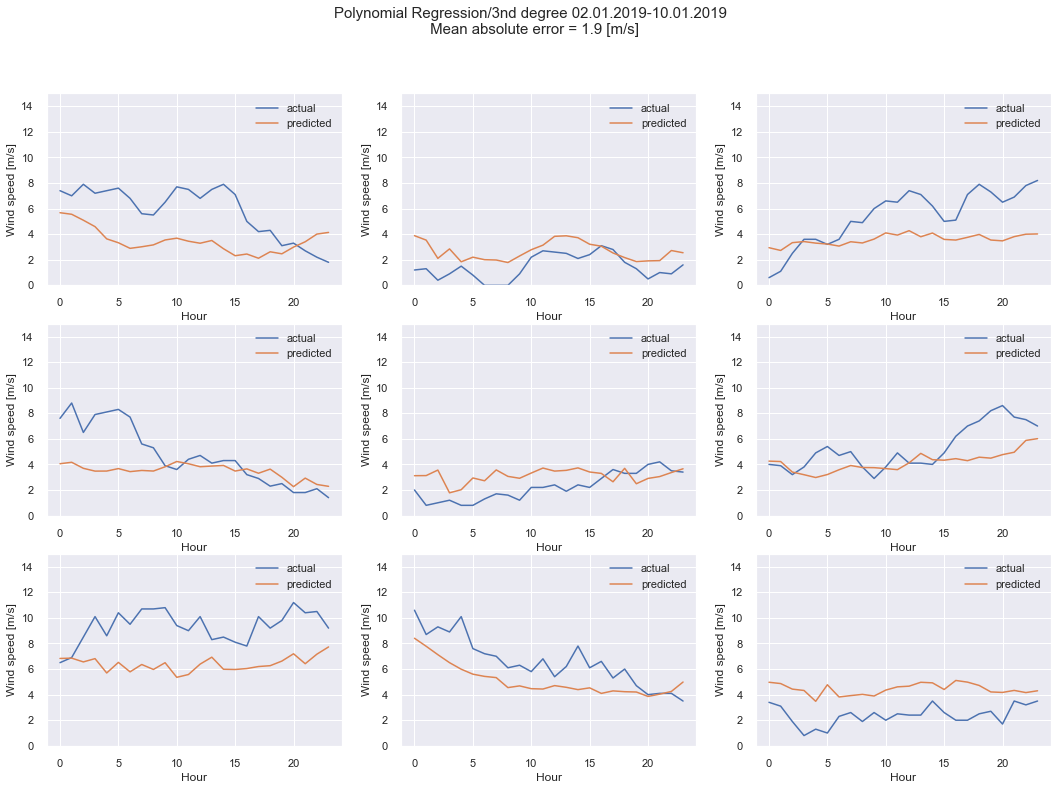

In [35]:
# polynomial regression

plt.figure(figsize=(18,12))
mae_sum=0

for i,j,k in zip(X_test_winter, X_train_winter, range(9)):
    
    X_train = X.loc[:j]
    X_test = X.loc[i]
    Y_train = Y.loc[:j]
    Y_test = Y.loc[i]
    
    poly_features = PolynomialFeatures(degree=3)
  
  # transforms the existing features to higher degree features.
    X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, Y_train)
  
  # predicting on test data-set
    y_pred = poly_model.predict(poly_features.fit_transform(X_test))
  
    # Metrics
    mae0 = mean_absolute_error(Y_test.values.ravel(), y_pred)
    rmse0 = np.sqrt(mean_squared_error(Y_test.values.ravel(), y_pred))
    r2 = r2_score(Y_test.values.ravel(), y_pred)
    
    mae_sum+=abs(mae0)
    plt.subplot(3,3,k+1)
    prediction_plot(Y_test, y_pred,'Wind speed [m/s]','Images/Wind_Poly_winter.png','Polynomial Regression/3nd degree 02.01.2019-10.01.2019 \n Mean absolute error = '+str(round(mae_sum/9,2))+' [m/s]')
    


## GradientBoostingRegressor

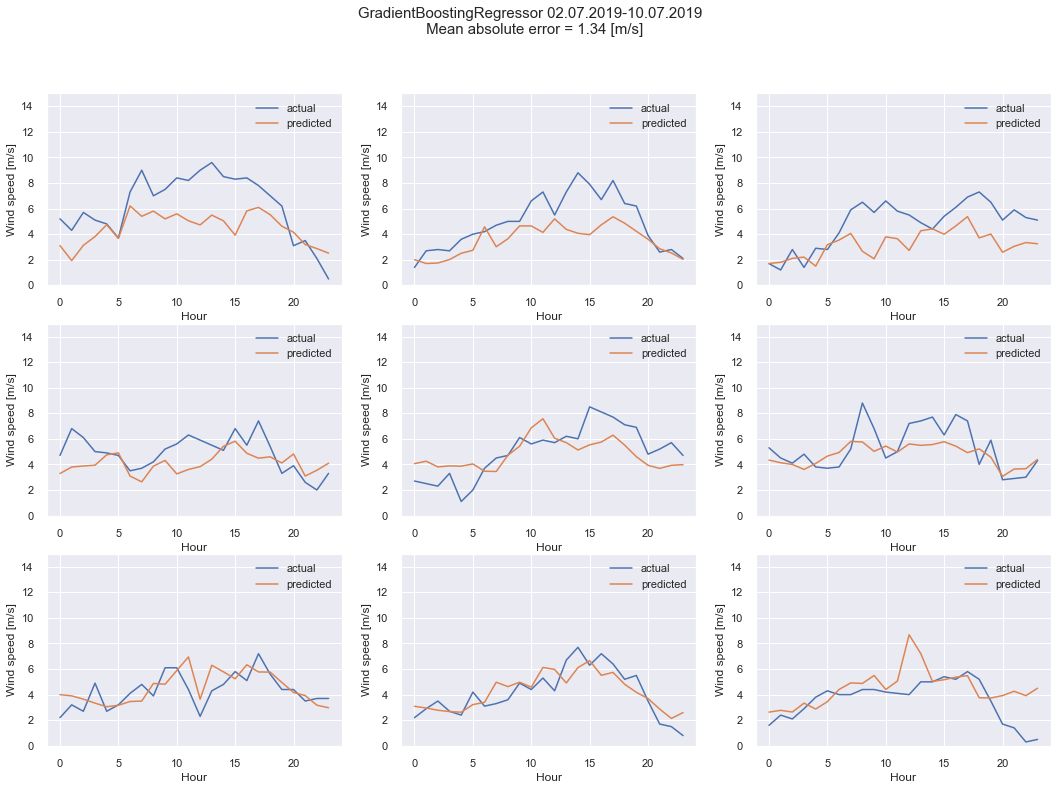

In [39]:
# Gradient Boosting Regressor

plt.figure(figsize=(18,12))
mae_sum=0

for i,j,k in zip(X_test_summer, X_train_summer, range(9)):
    
    X_train = X.loc[:j]
    X_test = X.loc[i]
    Y_train = Y.loc[:j]
    Y_test = Y.loc[i]
    # The mid model will use the default loss
    mid_model = GradientBoostingRegressor(loss="ls",learning_rate=1, max_depth=3, n_estimators=500)
    mid_model.fit(X_train, Y_train)
    # Record actual values on test set
    predictions = pd.DataFrame(Y_test)
    # Predict
    y_pred = mid_model.predict(X_test)
    # Metrics
    mae0 = mean_absolute_error(Y_test.values.ravel(), y_pred)
    # sum of mean absolute error
    mae_sum+=abs(mae0)
   
    plt.subplot(3,3,k+1)
    prediction_plot(Y_test, y_pred,'Wind speed [m/s]','Images/Wind_GradBoost_summer.png','GradientBoostingRegressor 02.07.2019-10.07.2019 \n Mean absolute error = '+str(round(mae_sum/9,2))+' [m/s]')
    


## AdaBoostRegressor

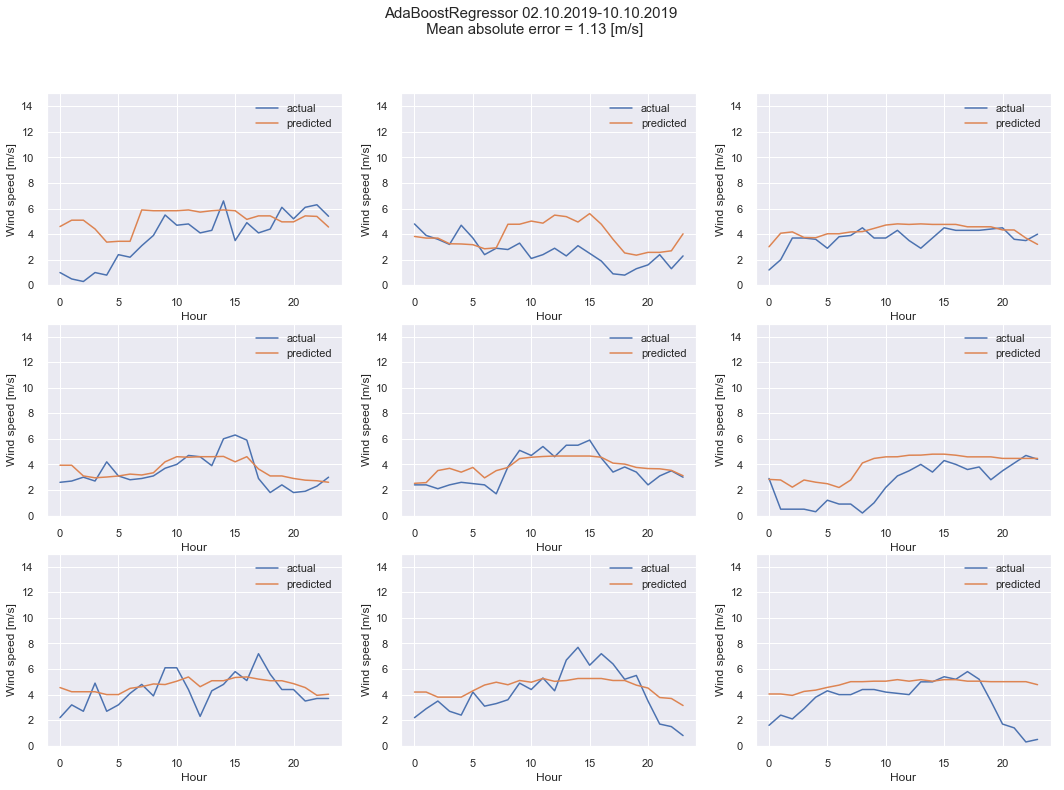

In [46]:
# Ada Boost Regressor

plt.figure(figsize=(18,12))
mae_sum=0

for i,j,k in zip(X_test_autumn, X_train_autumn, range(9)):
    
    X_train = X.loc[:j]
    X_test = X.loc[i]
    Y_train = Y.loc[:j]
    Y_test = Y.loc[i]
    
    regr = AdaBoostRegressor(random_state=0, n_estimators=200, learning_rate=0.5)
    regr.fit(X_train, Y_train)
    regr.feature_importances_
    y_pred = regr.predict(X_test)

    # Metrics
    mae0 = mean_absolute_error(Y_test.values.ravel(), y_pred)
    # sum of mean absolute error
    mae_sum+=abs(mae0)
   
    plt.subplot(3,3,k+1)
    prediction_plot(Y_test, y_pred,'Wind speed [m/s]','Images/Wind_ADA_autumn.png','AdaBoostRegressor 02.10.2019-10.10.2019 \n Mean absolute error = '+str(round(mae_sum/9,2))+' [m/s]')
    

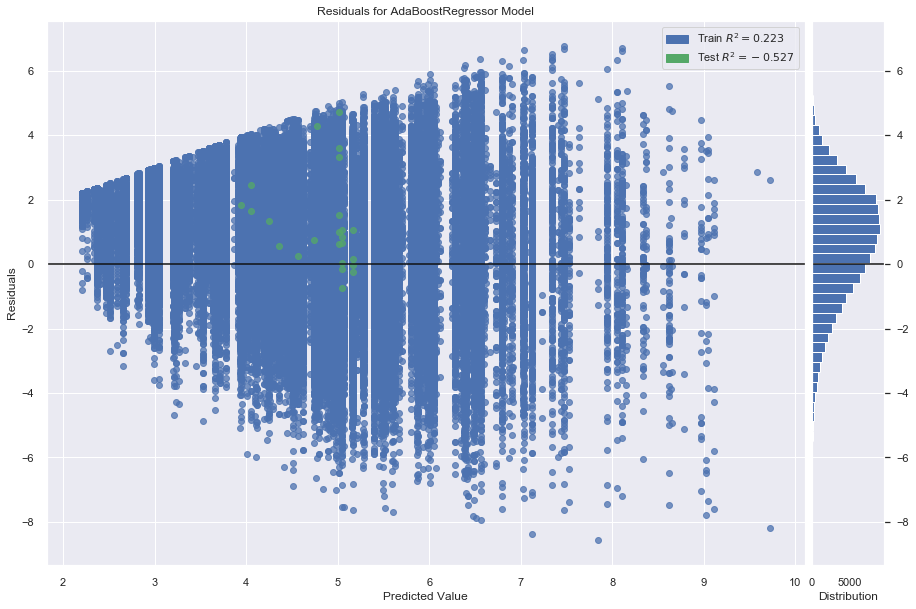

In [47]:
visualizer = ResidualsPlot(regr, size=(1080,720))
visualizer.fit(X_train, Y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, Y_test)  # Evaluate the model on the test data
visualizer.show(); 

## Random-Forest-Regressor

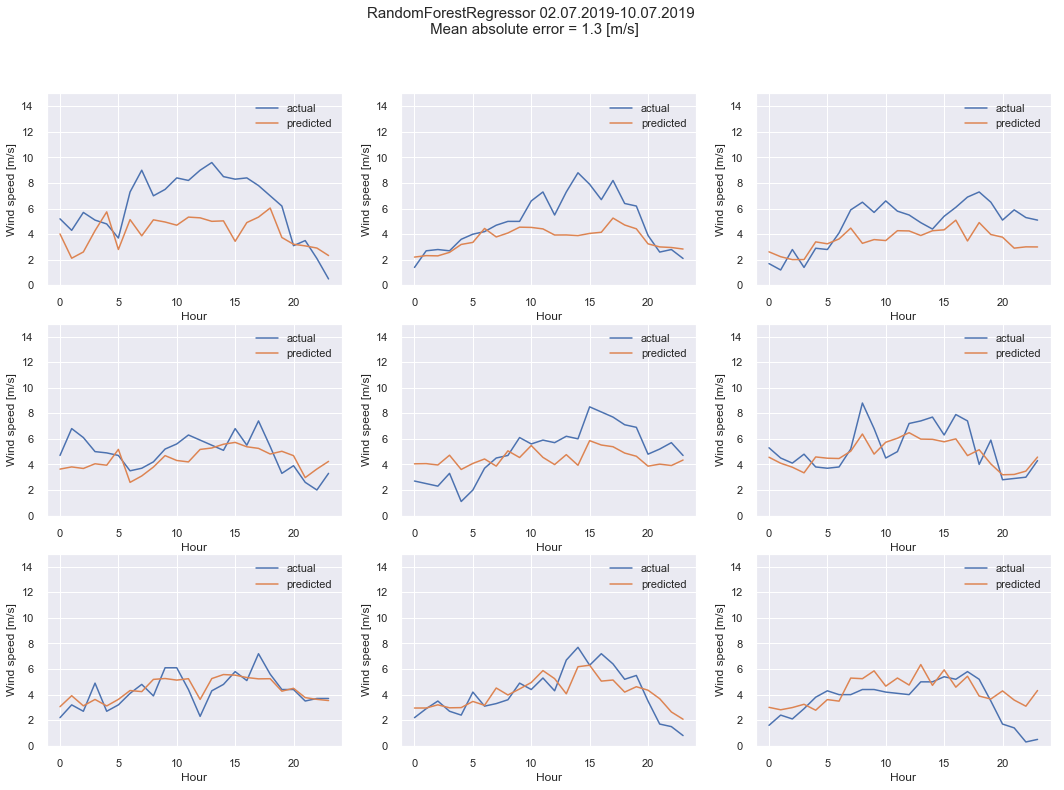

In [51]:
# Random Forest Regressor
plt.figure(figsize=(18,12))
mae_sum=0

for i,j,k in zip(X_test_summer, X_train_summer, range(9)):
    
    X_train = X.loc[:j]
    X_test = X.loc[i]
    Y_train = Y.loc[:j]
    Y_test = Y.loc[i]
    
    rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
    rf.fit(X_train, Y_train)
    y_pred = rf.predict(X_test)

    # Metrics
    mae0 = mean_absolute_error(Y_test.values.ravel(), y_pred)
    # sum of mean absolute error
    mae_sum+=abs(mae0)
   
    plt.subplot(3,3,k+1)
    prediction_plot(Y_test, y_pred,'Wind speed [m/s]','Images/Wind_RFR_summer.png','RandomForestRegressor 02.07.2019-10.07.2019 \n Mean absolute error = '+str(round(mae_sum/9,2))+' [m/s]')
    

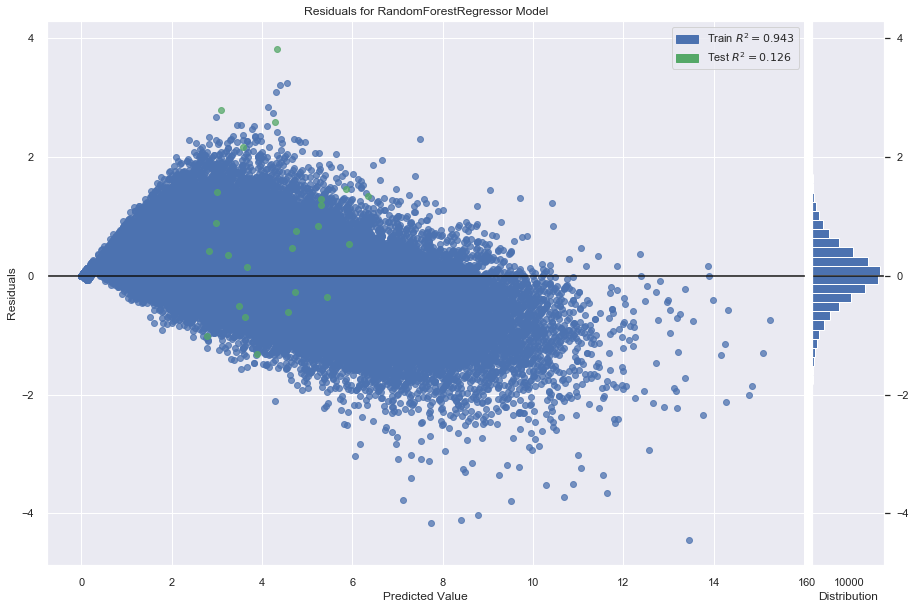

In [52]:
visualizer = ResidualsPlot(rf, size=(1080,720))
visualizer.fit(X_train, Y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, Y_test)  # Evaluate the model on the test data
visualizer.show(); 

In [53]:
## Feature importances :

feature_list = X.columns

# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: P                    Importance: 0.21
Variable: RF_TU                Importance: 0.18
Variable: V_TE050              Importance: 0.18
Variable: DD                   Importance: 0.15
Variable: ZENIT                Importance: 0.12
Variable: V_N                  Importance: 0.09
Variable: FD_LBERG             Importance: 0.04
Variable: FG_LBERG             Importance: 0.04


In [45]:
from sklearn.model_selection import GridSearchCV

X_train = X[:-48]
X_test = X[-48:-24]
Y_train = Y[:-48]
Y_test = Y[-48:-24]

rf_model = RandomForestRegressor()

#brute force scan for all parameters, here are the tricks
#usually max_depth is 6,7,8
#learning rate is around 0.05, but small changes may make big diff
#tuning min_child_weight subsample colsample_bytree can have 
#much fun of fighting against overfit 
#n_estimators is how many round of boosting
#finally, ensemble xgboost with multiple seeds may reduce variance
 
parameters = {'criterion': ['mse'],
              'max_depth': np.arange(3,11,1),
              'max_features': ['auto'],
              'max_leaf_nodes': [None],
              'min_impurity_decrease': [0.0],
              'min_impurity_split': [None],
              'min_samples_leaf': [1],
              'min_samples_split': [2],
              'min_weight_fraction_leaf': [0.0],
              'n_estimators': np.arange(10,100,1),
              'n_jobs': [-1],
              'oob_score': [False],
              'random_state': [0],
              'verbose': [0],
              'warm_start': [False]}


rf_grid = GridSearchCV(rf_model, parameters, cv = 5 ,n_jobs = 5, verbose=True)

rf_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   14.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.9min
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:  7.6min
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed: 14.0min
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed: 25.3min
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed: 43.9min
[Parallel(n_jobs=5)]: Done 2440 tasks      | elapsed: 64.9min
[Parallel(n_jobs=5)]: Done 3190 tasks      | elapsed: 99.8min
[Parallel(n_jobs=5)]: Done 3600 out of 3600 | elapsed: 121.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=Non...
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63,

In [46]:
rf_grid.best_params_

{'criterion': 'mse',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 69,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [56]:
## RandomForest with best parameters

rf = RandomForestRegressor(max_depth=None,max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf =0.0, n_estimators=1000, random_state=0, oob_score=False, verbose=0)
                           

rf.fit(X_train, Y_train)

Y_pred = rf.predict(X_test)

In [57]:
# Metrics
mae0 = mean_absolute_error(Y_test.values.ravel(), Y_pred)
rmse0 = np.sqrt(mean_squared_error(Y_test.values.ravel(), Y_pred))
r2 = r2_score(Y_test.values.ravel(), Y_pred)

# Print metrics
print('Mean Absolute Error:', round(mae0, 2))
print('RMSE:', round(rmse0, 2))
print('R2:', round(r2, 2))

Mean Absolute Error: 1.69
RMSE: 1.97
R2: 0.66


## XGBoost Regressor

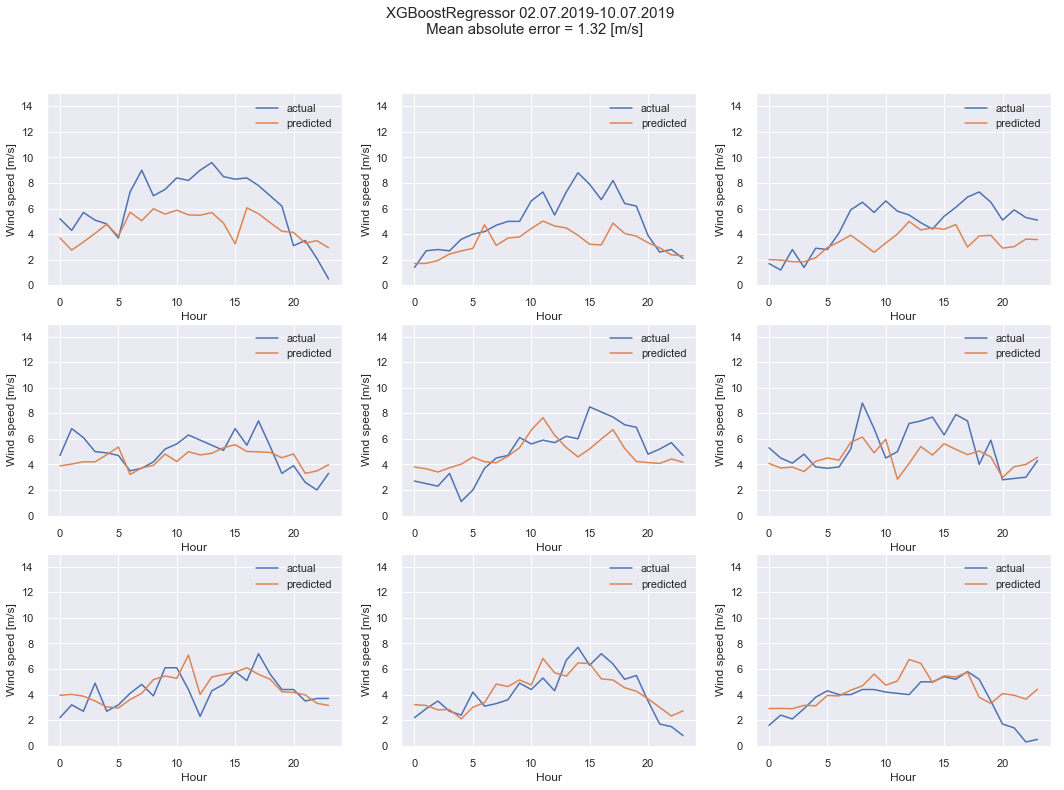

In [57]:
plt.figure(figsize=(18,12))
mae_sum=0

for i,j,k in zip(X_test_summer, X_train_summer, range(9)):
    
    X_train = X.loc[:j]
    X_test = X.loc[i]
    Y_train = Y.loc[:j]
    Y_test = Y.loc[i]
    
    model = xgb.XGBRegressor(n_estimators=1000,learning_rate=0.7)
    model.fit(X_train,Y_train)
    y_pred = model.predict(data=X_test)

    # Metrics
    mae0 = mean_absolute_error(Y_test.values.ravel(), y_pred)
    # sum of mean absolute error
    mae_sum+=abs(mae0)
   
    plt.subplot(3,3,k+1)
    prediction_plot(Y_test, y_pred,'Wind speed [m/s]','Images/Wind_XGB_summer.png','XGBoostRegressor 02.07.2019-10.07.2019 \n Mean absolute error = '+str(round(mae_sum/9,2))+' [m/s]')
    

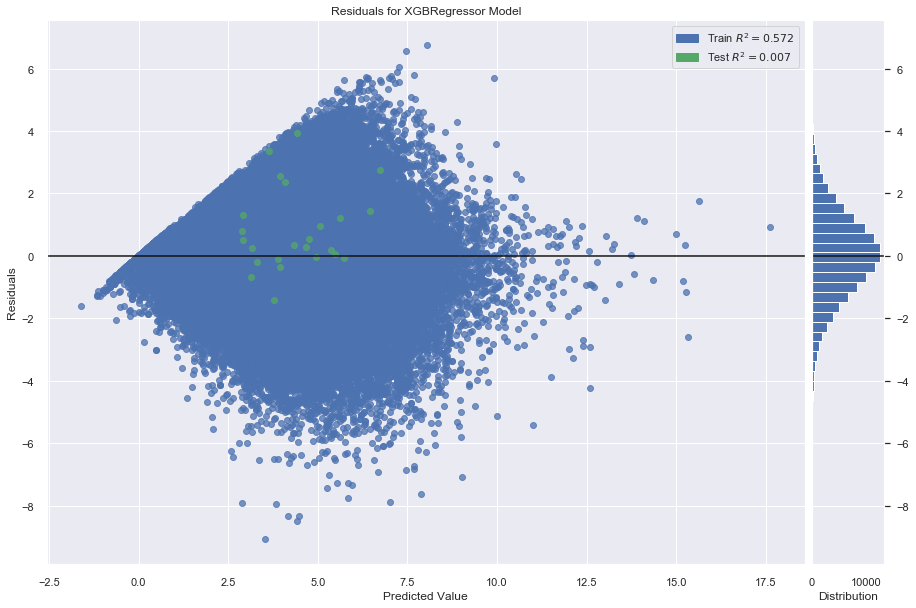

In [58]:
visualizer = ResidualsPlot(model, size=(1080,720))
visualizer.fit(X_train, Y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, Y_test)  # Evaluate the model on the test data
visualizer.show(); 

In [60]:
from sklearn.model_selection import GridSearchCV

X_train = X[:-48]
X_test = X[-48:-24]
Y_train = Y[:-48]
Y_test = Y[-48:-24]

xgb_model = xgb.XGBRegressor()

parameters = {'nthread':[4], 
              'objective':['reg:linear'],
              'learning_rate': np.arange(0.1, 1, 0.2), 
              'max_depth': np.arange(3,6,1),
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': np.arange(500,3000,500)}


xgb_grid = GridSearchCV(xgb_model, parameters, cv = 5 ,n_jobs = 5, verbose=True)

xgb_grid.fit(X_train,Y_train)



Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed: 10.5min
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed: 63.9min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed: 183.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bytree=1,
                                    gamma=0, learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=...
             iid='warn', n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': array([0.1, 0.3, 0.5, 0.7, 0.9]),
                         'max_depth': array([3, 4, 5]), 'min_child_weight': [4],
                         'n_estimators': array([ 500, 1000, 1500, 2000, 2500]),
  

In [61]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.6683311628078997
{'colsample_bytree': 0.7, 'learning_rate': 0.30000000000000004, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 1000, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [62]:
model = xgb.XGBRegressor(colsample_bytree= 0.7, learning_rate= 0.3, max_depth= 3, min_child_weight= 4,
                         n_estimators= 1000, nthread= 4, silent= 1, subsample= 0.7)
model.fit(X_train,Y_train)

#Prediction
Y_pred = model.predict(data=X_test)

In [64]:
# Metrics
mae0 = mean_absolute_error(Y_test.values.ravel(), Y_pred)
rmse0 = np.sqrt(mean_squared_error(Y_test.values.ravel(), Y_pred))
r2 = r2_score(Y_test.values.ravel(), Y_pred)

# Print metrics
print('Mean Absolute Error:', round(mae0, 2))
print('RMSE:', round(rmse0, 2))
print('R2:', round(r2, 2))

Mean Absolute Error: 1.56
RMSE: 1.79
R2: 0.73


### XGBoost Regressor for 2018

In [9]:
# train/test split

X = df[['FD_LBERG', 'FG_LBERG', 'ZENIT', 'RF_TU', 'V_N', 'P', 'DD', 'V_TE050']]
Y = df.FF

test_period = pd.date_range('2018-01-01', '2018-12-31', freq='D')
test_period = test_period.astype(str)
train_period = pd.date_range('2017-12-31', '2018-12-30', freq='D')
train_period = train_period.astype(str)

mae_sum=0
predictions = []
for i,j in zip(test_period, train_period):
    
    X_train = X.loc[:j]
    X_test = X.loc[i]
    Y_train = Y.loc[:j]
    Y_test = Y.loc[i]
    
    model = xgb.XGBRegressor(n_estimators=500,learning_rate=0.7)
    model.fit(X_train,Y_train)
    y_pred = model.predict(data=X_test)
    predictions.append(y_pred)
    
    # Metrics
    mae0 = mean_absolute_error(Y_test.values.ravel(), y_pred)
    # sum of mean absolute error
    mae_sum+=abs(mae0)

predictions = pd.DataFrame(predictions)
predictions = predictions.stack().reset_index().rename(columns={0:'pred'})

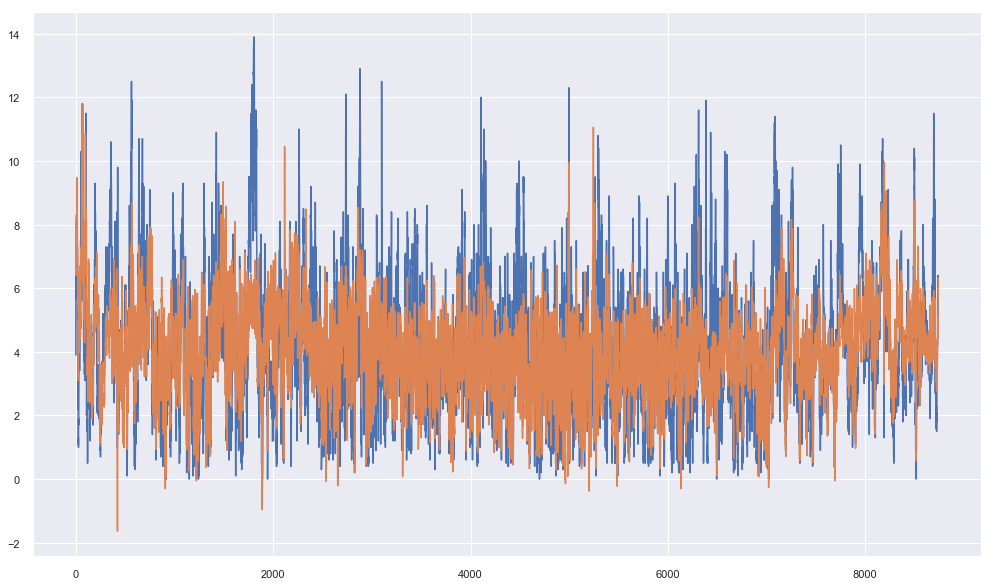

In [10]:
plt.figure(figsize=(17,10))
plt.plot(Y.loc['2018-01-01':'2018-12-31'].values)
plt.plot(predictions.pred)

In [11]:
mae_sum/365

1.3569526613234546

In [12]:
predictions.to_csv(r'Wind_XGB_2018_500estimators.csv')

## KNeighborsRegressor

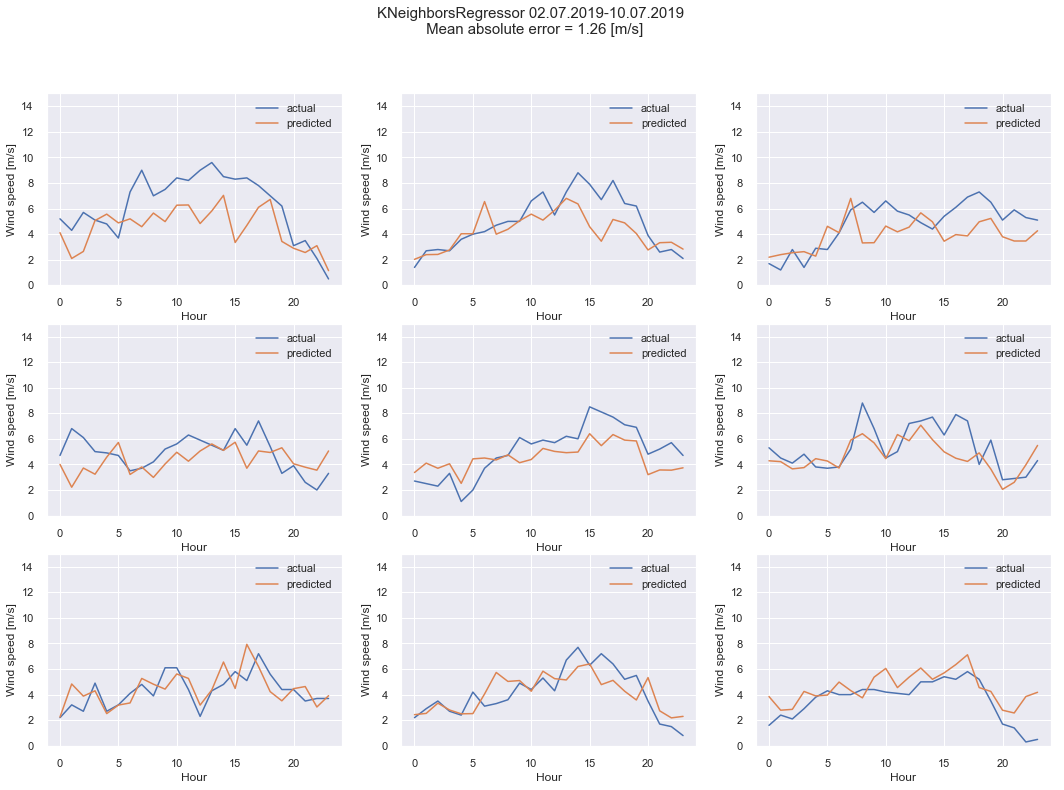

In [64]:
plt.figure(figsize=(18,12))
mae_sum=0

for i,j,k in zip(X_test_summer, X_train_summer, range(9)):
    
    X_train = X.loc[:j]
    X_test = X.loc[i]
    Y_train = Y.loc[:j]
    Y_test = Y.loc[i]
    
    knr = KNeighborsRegressor(n_neighbors=6)
    knr.fit(X_train, Y_train)
    y_pred = knr.predict(X_test)

    # Metrics
    mae0 = mean_absolute_error(Y_test.values.ravel(), y_pred)
    # sum of mean absolute error
    mae_sum+=abs(mae0)
   
    plt.subplot(3,3,k+1)
    prediction_plot(Y_test, y_pred,'Wind speed [m/s]','Images/Wind_KNN_summer.png','KNeighborsRegressor 02.07.2019-10.07.2019 \n Mean absolute error = '+str(round(mae_sum/9,2))+' [m/s]')
    

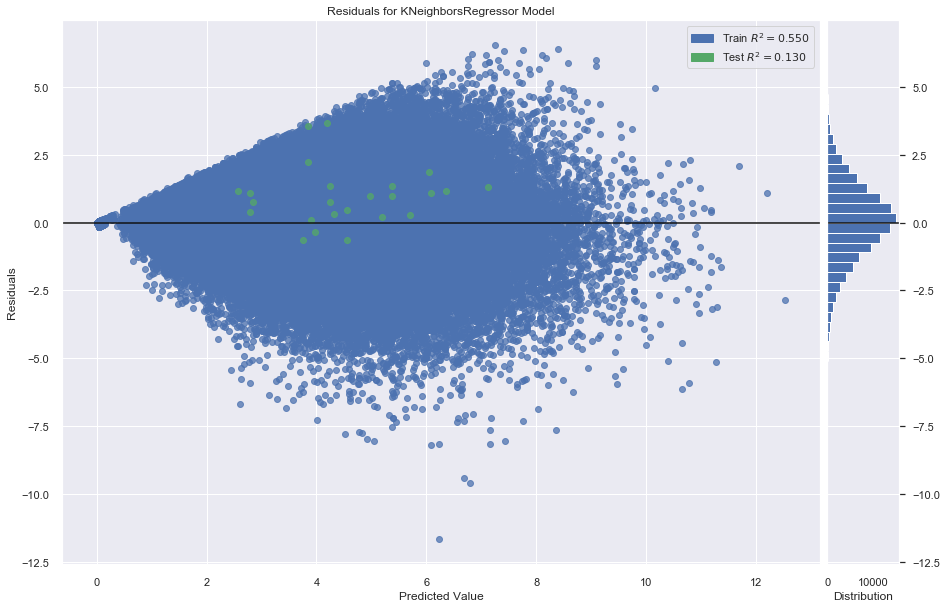

In [65]:
visualizer = ResidualsPlot(knr, size=(1080,720))
visualizer.fit(X_train, Y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, Y_test)  # Evaluate the model on the test data
visualizer.show();

## Support Vector Regressor

In [ ]:
# take a lot of time
from sklearn.svm import SVR
clf = SVR(kernel='poly', degree=3, C=1.0, gamma='auto', epsilon=0.2)
Y_pred = clf.fit(X_train, Y_train).predict(X_test)


In [ ]:
## Trying out different kernels

# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

# #############################################################################

lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(X, svr.fit(X, Y).predict(X), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_], Y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     Y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

In [ ]:
svr_poly
svr.fit(X, Y).predict(X)

## Auto Regressive Integrated Moving Average - ARIMA

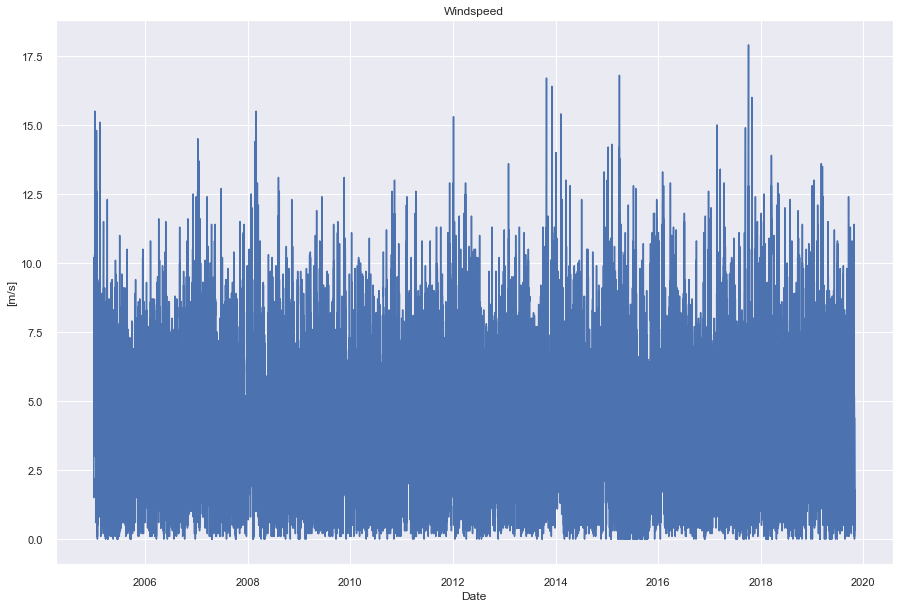

In [71]:
plt.figure(figsize=(15,10))
plt.plot(df.FF)
plt.xlabel('Date')
plt.ylabel('[m/s]')
plt.title('Windspeed');


In [68]:
# Determine rolling statistics
rolmean = df.FF.rolling(window=720).mean() #window size 720 denotes 1 month, giving rolling mean at yearly level
rolstd = df.FF.rolling(window=720).std()
# print(rolmean,rolstd)

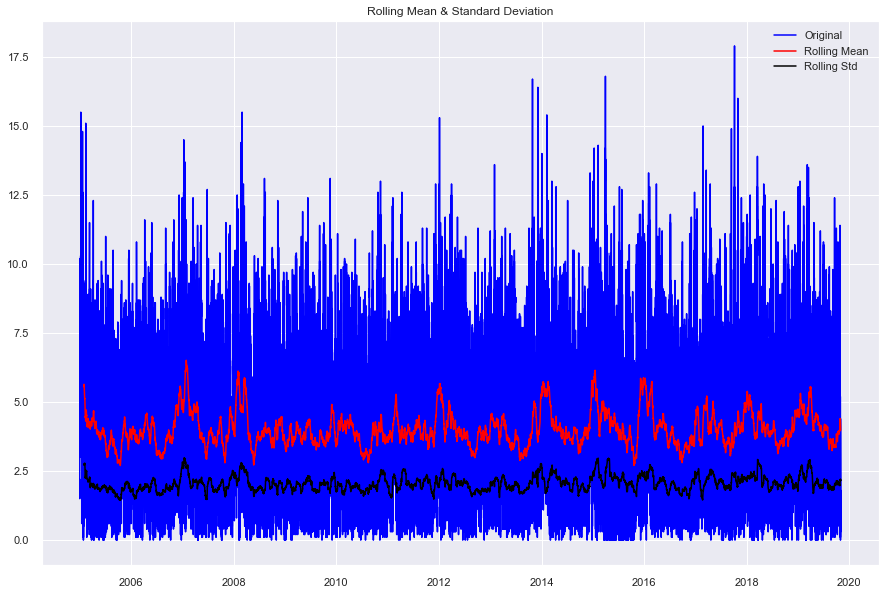

In [73]:
# Plot rolling statistics
plt.figure(figsize=(15,10))
plt.plot(df.FF, color='blue', label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [78]:
# Perform Augmented Dickey–Fuller test:

print('Results of Dickey Fuller Test:')
dftest = adfuller(df.FF, autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                    -29.474764
p-value                             0.000000
#Lags Used                         72.000000
Number of Observations Used    129506.000000
Critical Value (1%)                -3.430400
Critical Value (5%)                -2.861562
Critical Value (10%)               -2.566782
dtype: float64


In [ ]:
# For a Time series to be stationary, its ADCF test should have:

# p-value to be low (according to the null hypothesis)  ---> accomplished
# The critical values at 1%, 5%, 10% confidence intervals should be as close as possible to the Test Statistics!
# The dataset is stationary!

# For non stationary dataset there are diffenent ways to achieve stationary: transformation with log, 
# exponential decay and time shift

In [ ]:
model = ARIMA(df.FF, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.figure(figsize=(15,10))
plt.plot(df.FF)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - df.FF)**2))
print('Plotting ARIMA model')


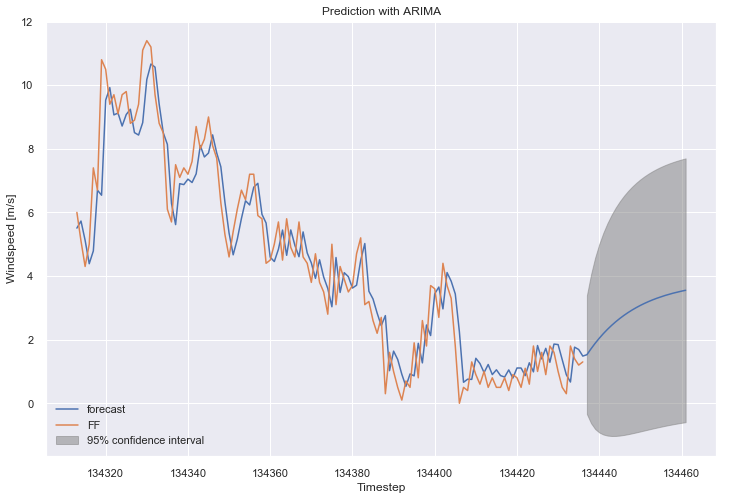

In [14]:
sns.set(rc={'figure.figsize':(12,8)})

results_ARIMA.plot_predict(len(df.FF)-124,len(df.FF)+24);
plt.legend(loc='lower left')
plt.title('Prediction with ARIMA')
plt.xlabel('Timestep')
plt.ylabel('Windspeed [m/s]')
x=results_ARIMA.forecast(steps=24)

In [15]:
model = ARIMA(df_arima_wind.values, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)

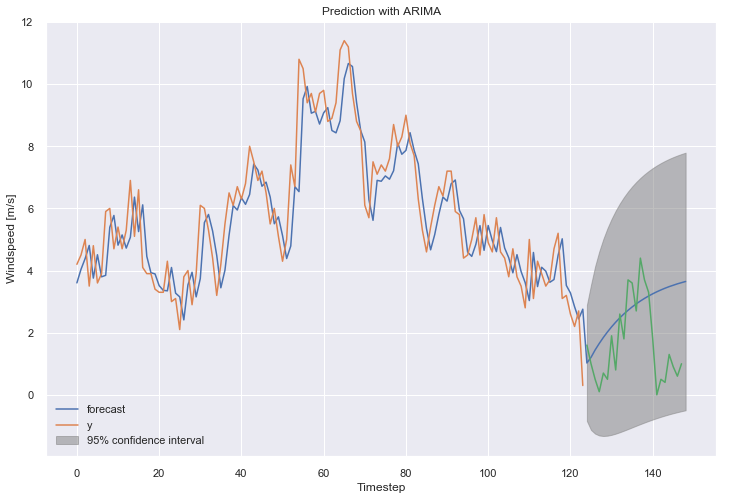

In [16]:
sns.set(rc={'figure.figsize':(12,8)})

results_ARIMA.plot_predict(len(df_arima_wind)-124,len(df_arima_wind)+24);
plt.legend(loc='lower left')
plt.title('Prediction with ARIMA')
plt.xlabel('Timestep')
plt.ylabel('Windspeed [m/s]')
x=results_ARIMA.forecast(steps=24)
plt.plot(range(124,148,1),df_wind.FF.values[-48:-24])

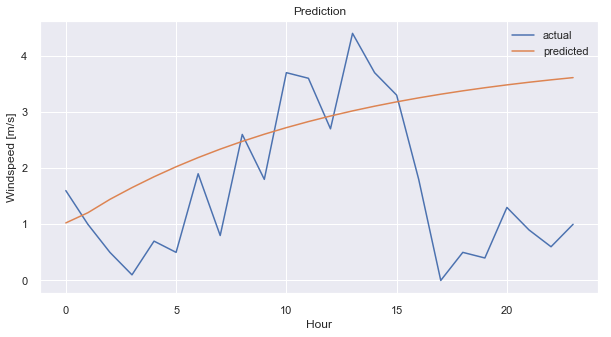

In [17]:
prediction_plot(df_wind.FF[-48:-24], pd.DataFrame(x[0]))

In [18]:
# Metrics
mae0 = mean_absolute_error(df_wind.FF[-48:-24], pd.DataFrame(x[0]))
rmse0 = np.sqrt(mean_squared_error(df_wind.FF[-48:-24], pd.DataFrame(x[0])))
r2 = r2_score(df_wind.FF[-48:-24],  pd.DataFrame(x[0]))

# Print metrics
print('Mean Absolute Error:', round(mae0, 2))
print('RMSE:', round(rmse0, 2))
print('R2:', round(r2, 2))

Mean Absolute Error: 1.41
RMSE: 1.73
R2: -0.83


## SARIMAX Regression

In [62]:
# p: Trend autoregression order.
# d: Trend difference order.
# q: Trend moving average order.

# P: Seasonal autoregressive order.
# D: Seasonal difference order.
# Q: Seasonal moving average order.
# m: The number of time steps for a single seasonal period.
 
# order=(p,d,q),seasonal_order=(P,D,Q,m)


p_values = [0,1,2]
d_values = [0,1,2]
q_values = [0,1,2]

'''
0,0,0
0,0,1
0,0,2
0,1,0
0,1,1
0,1,2
0,2,0
0,2,1
0,2,2

1,0,0
1,0,1
1,0,2
1,1,0
1,1,1
1,1,2
1,2,0
1,2,1
1,2,2

2,0,0
2,0,1
2,0,2
2,1,0
2,1,1
2,1,2
2,2,0
2,2,1
2,2,2
'''

mae0 = []
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            model = sm.tsa.statespace.SARIMAX(Y_train, exog=X_train, error_action='ignore', trend='c', order=order, seasonal_order=(1,0,5,1))
            model_fit = model.fit()
            y_pred = model_fit.predict(start=len(X_train), end=len(X_train)+23, exog = X_test)
            mae0.append(mean_absolute_error(Y_test.values.ravel(), y_pred))

//anaconda3/envs/nf/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
//anaconda3/envs/nf/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
//anaconda3/envs/nf/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
//anaconda3/envs/nf/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
//anaconda3/envs/nf/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. C

In [67]:
mae0_comb = mae0
mae0_comb

[1.8098337585419484,
 1.1678013523601265,
 1.5118395795792843,
 0.6331498131517179,
 0.5614870027106676,
 0.5612912161481532,
 1.0045423134084015,
 0.7303644808216895,
 0.7776530914269486,
 0.8814841017830902,
 1.1763929346590298,
 0.8029034613171446,
 0.5922996937637971,
 0.5733621604136144,
 0.5707778981554742,
 0.8668901978138474,
 0.6130704223088372,
 0.7556570720064685,
 1.953581289982868,
 0.7008071410384651,
 1.7267050402737951,
 0.5834419642230079,
 0.6601486922188337,
 0.6603657807896689,
 1.1115964659920556,
 0.713157890693136,
 0.7721955100668104]

//anaconda3/envs/nf/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
//anaconda3/envs/nf/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
//anaconda3/envs/nf/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
//anaconda3/envs/nf/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
//anaco

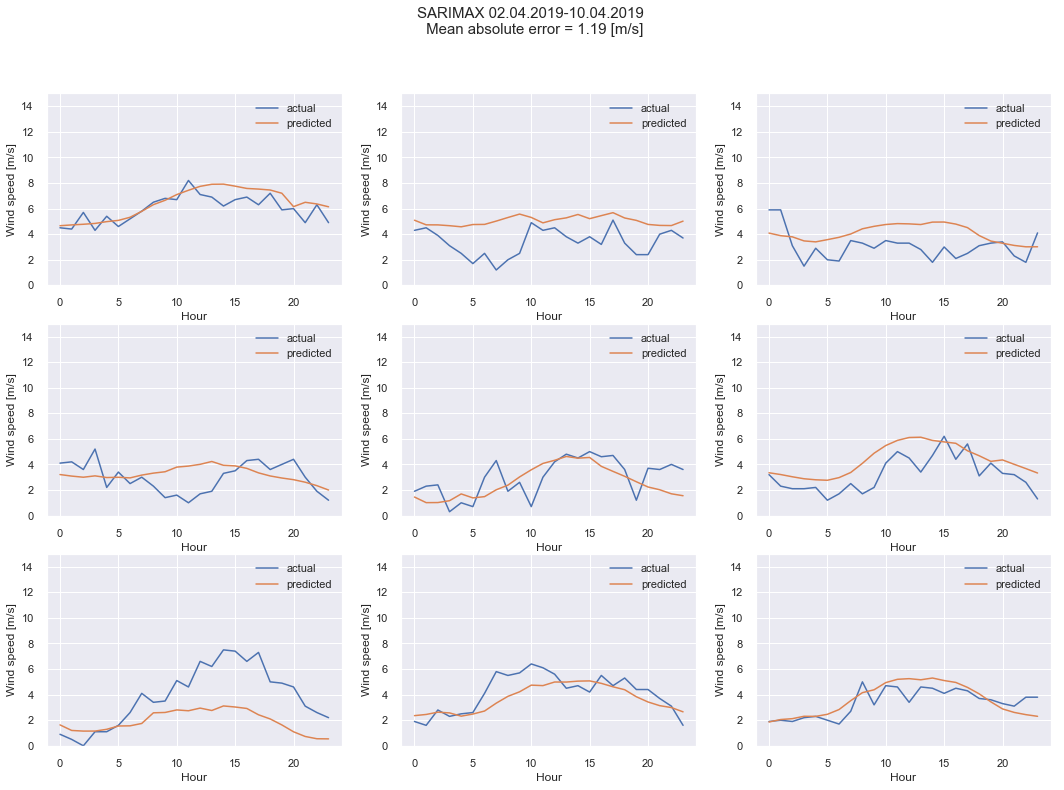

In [83]:
# best combination

plt.figure(figsize=(18,12))
mae_sum=0

for i,j,k in zip(X_test_spring, X_train_spring, range(9)):
    
    X_train = X.loc[:j]
    X_test = X.loc[i]
    Y_train = Y.loc[:j]
    Y_test = Y.loc[i]

    model = sm.tsa.statespace.SARIMAX(Y_train, exog=X_train, trend='c', order=(0,1,2),seasonal_order=(1,0,5,1))
    model_fit = model.fit()
    y_pred = model_fit.predict(start=len(X_train), end=len(X_train)+23, exog = X_test)
    # Metrics
    mae0 = mean_absolute_error(Y_test.values.ravel(), y_pred)
    # sum of mean absolute error
    mae_sum+=abs(mae0)
   
    plt.subplot(3,3,k+1)
    prediction_plot(Y_test, y_pred.values,'Wind speed [m/s]','Images/Wind_SARIMAX_spring.png','SARIMAX 02.04.2019-10.04.2019 \n Mean absolute error = '+str(round(mae_sum/9,2))+' [m/s]')
    

In [35]:
# Metrics
mae0 = mean_absolute_error(Y_test.values.ravel(), y_pred)
rmse0 = np.sqrt(mean_squared_error(Y_test.values.ravel(), y_pred))
r2 = r2_score(Y_test.values.ravel(), y_pred)

# Print metrics
print('Mean Absolute Error:', round(mae0, 2))
print('RMSE:', round(rmse0, 2))
print('R2:', round(r2, 2))

Mean Absolute Error: 0.56
RMSE: 0.67
R2: 0.73


In [71]:
from pmdarima.arima import auto_arima
step_wise=auto_arima(Y_train, exogenous = X_train, start_p=1, start_q=1, max_p=7, max_q=7, d=1, max_d=7,
                     trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)



Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=354672.334, BIC=354799.845, Fit time=157.474 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=367701.450, BIC=367809.344, Fit time=49.048 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=357677.448, BIC=357795.150, Fit time=69.927 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=355418.520, BIC=355536.222, Fit time=83.963 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=367729.168, BIC=367827.253, Fit time=242.210 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=354390.536, BIC=354527.855, Fit time=57.371 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=355779.120, BIC=355906.630, Fit time=153.776 seconds
Fit ARIMA: order=(3, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=368313.362, BIC=368460.489, Fit time=69.713 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=354341.006, BIC=354488.133, Fit time=126.

In [72]:
# 2,0,3 SARIMAX
step_wise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:               134389
Model:               SARIMAX(3, 1, 5)   Log Likelihood             -175949.322
Date:                Sat, 04 Jan 2020   AIC                         351936.645
Time:                        22:06:25   BIC                         352123.006
Sample:                             0   HQIC                        351992.460
                             - 134389                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -2.614e-05      0.000     -0.157      0.875      -0.000       0.000
FD_LBERG       0.0012      0.000      5.744      0.000       0.001       0.002
FG_LBERG       0.0013      0.000     11.358      0.000       0.001       0.001
ZENIT         -0.0089      0.000    -27.094      0.000      -0.010      -0.008
RF_TU         -0.0454      0.000   -116.360      0.000      -0.046      -0.045
V_N            0.0449      0.002     20.954      0.000       0.041       0.049
V_S1_CS        0.0058      0.003      1.788      0.074      -0.001       0.012
V_S1_HHS   -1.414e-05   4.12e-06     -3.429      0.001   -2.22e-05   -6.06e-06
P             -0.1247      0.003    -48.903      0.000      -0.130      -0.120
DD             0.0010    4.6e-05     22.101      0.000       0.001       0.001
ar.L1         -0.0288      0.160     -0.180      0.857      -0.342       0.285
ar.L2          0.0360      0.138      0.260      0.795      -0.235       0.307
ar.L3          0.7269      0.140      5.196      0.000       0.453       1.001
ma.L1         -0.2944      0.160     -1.840      0.066      -0.608       0.019
ma.L2         -0.1046      0.165     -0.632      0.527      -0.429       0.220
ma.L3         -0.7533      0.172     -4.386      0.000      -1.090      -0.417
ma.L4          0.2002      0.038      5.201      0.000       0.125       0.276
ma.L5          0.0174      0.003      5.709      0.000       0.011       0.023
sigma2         0.8116      0.002    397.653      0.000       0.808       0.816
===================================================================================
Ljung-Box (Q):                      400.65   Jarque-Bera (JB):             76054.48
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                             0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

//anaconda3/envs/nf/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


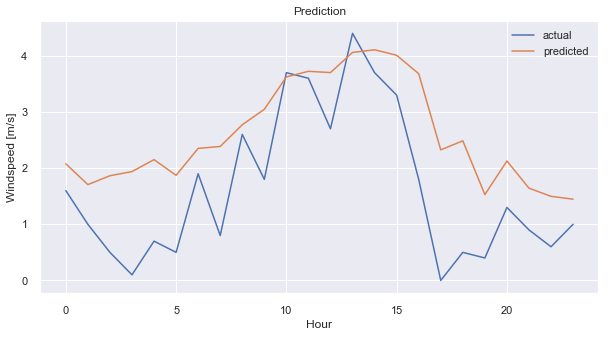

In [73]:
model = sm.tsa.statespace.SARIMAX(Y_train, exog=X_train, trend='c', order=(3,1,5),seasonal_order=(1,0,5,1))
model_fit = model.fit()
y_pred = model_fit.predict(start=len(X_train), end=len(X_train)+23, exog = X_test)
prediction_plot(Y_test,y_pred.values)

In [74]:
# Metrics
mae0 = mean_absolute_error(Y_test.values.ravel(), y_pred)
rmse0 = np.sqrt(mean_squared_error(Y_test.values.ravel(), y_pred))
r2 = r2_score(Y_test.values.ravel(), y_pred)

# Print metrics
print('Mean Absolute Error:', round(mae0, 2))
print('RMSE:', round(rmse0, 2))
print('R2:', round(r2, 2))

Mean Absolute Error: 0.98
RMSE: 1.16
R2: 0.18
